In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv('AB_NYC_2019.csv')

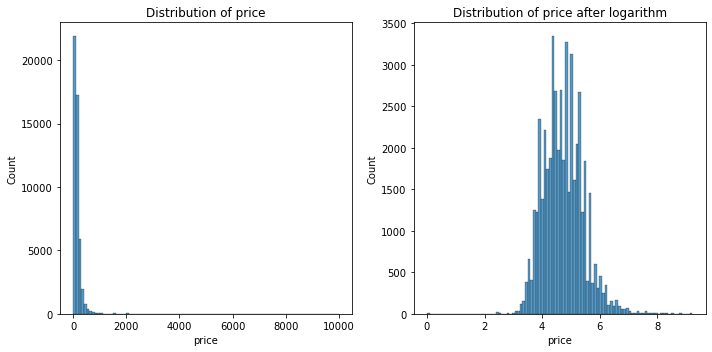

In [32]:
#EDA

fig, axes = plt.subplots(1, 2, figsize=(10, 5))


sns.histplot(df.price,ax=axes[0],bins=100)
axes[0].set_title('Distribution of price');

sns.histplot(np.log1p( df.price ),ax=axes[1],bins=100)
axes[1].set_title('Distribution of price after logarithm');

plt.tight_layout()

In [33]:
#Question 1
base=['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
df[base].isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [34]:
#Question 2
df['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [35]:
#split the data for question 3

np.random.seed(42)

n=len(df)
idx=np.arange(n)
np.random.shuffle(idx)

n_val=int( n*0.2 )
n_test=int(n*0.2)
n_train=n-n_val-n_test

y=df.price
y=np.log1p(y)



df_train=df.iloc[idx[:n_train] ]
df_val=df.iloc[idx[n_train:n_train+n_val] ]
df_test=df.iloc[idx[n_train+n_val:]]

y_train=y.iloc[idx[:n_train]]
y_val=y.iloc[idx[n_train:n_train+n_val] ]
y_test=y.iloc[idx[n_train+n_val:]]

df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [36]:
base=['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [37]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

def rmse(y,y_pred):
    se=(y-y_pred)**2
    mse=se.mean()
    return np.sqrt(mse)

In [38]:
#Question 3

#fill missing values with 0

def prepare_X_fillzero(df,base_1):
    df=df.copy()
    df_num=df[base_1]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

X_train=prepare_X_fillzero(df_train,base)
w0,w=train_linear_regression(X_train,y_train)

X_val=prepare_X_fillzero(df_val,base)
y_pred=w0+X_val.dot(w)
score=rmse(y_val,y_pred)
round(score,2)


0.51

In [40]:
#Question 3

#fill missing values with mean

def prepare_X_fillmean(df,base_1):
    df=df.copy()
    df_num=df[base_1]
    for i in base_1:
        mean_i=df[i].mean()
        df_num.loc[:,i]=df_num.loc[:,i].fillna(mean_i)
    X=df_num.values
    return X

X_train=prepare_X_fillmean(df_train,base)
w0,w=train_linear_regression(X_train,y_train)

X_val=prepare_X_fillmean(df_val,base)
y_pred=w0+X_val.dot(w)
score=rmse(y_val,y_pred)
round(score,2)


0.51

In [41]:
def train_linear_regression_reg(X,y,r=0.001):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    XTX=XTX+ r* np.eye(XTX.shape[0])
    
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    
    return w_full[0],w_full[1:]

In [42]:
#Question 4
X_train=prepare_X_fillzero(df_train,base)

list_rmse=[]
list_r=[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in list_r:
    w0,w=train_linear_regression_reg(X_train,y_train,r)
    
    X_val=prepare_X_fillmean(df_val,base)
    y_pred=w0+X_val.dot(w)
    score=rmse(y_val,y_pred)
    
    list_rmse.append(score)
    
array_rmse=np.array(list_rmse)

list_r[ np.argmin(array_rmse) ]

0

In [43]:
#Question 5
array_seed=np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

list_score=[]
for i in array_seed:
    np.random.seed(i)

    n=len(df)
    idx=np.arange(n)
    np.random.shuffle(idx)

    n_val=int( n*0.2 )
    n_test=int(n*0.2)
    n_train=n-n_val-n_test

    df_train=df.iloc[idx[:n_train] ]
    df_val=df.iloc[idx[n_train:n_train+n_val] ]
    df_test=df.iloc[idx[n_train+n_val:]]

    y_train=y.iloc[idx[:n_train]]
    y_val=y.iloc[idx[n_train:n_train+n_val] ]
    y_test=y.iloc[idx[n_train+n_val:]]

    df_train=df_train.reset_index(drop=True)
    df_val=df_val.reset_index(drop=True)
    df_test=df_test.reset_index(drop=True)
    
    X_train=prepare_X_fillzero(df_train,base)
    w0,w=train_linear_regression(X_train,y_train)
    
    X_val=prepare_X_fillzero(df_val,base)
    y_pred=w0+X_val.dot(w)
    
    score=rmse(y_val,y_pred)
    list_score.append(score)

array_score=np.array(list_score)
round( np.std(array_score)  ,3 )

0.024

In [47]:
#Question 6

np.random.seed(9)

n=len(df)
idx=np.arange(n)
np.random.shuffle(idx)

n_val=int( n*0.2 )
n_test=int(n*0.2)
n_train=n-n_val-n_test

y=df.price
y=np.log1p(y)
# del df['price']


df_train=df.iloc[idx[:n_train] ]
df_val=df.iloc[idx[n_train:n_train+n_val] ]
df_test=df.iloc[idx[n_train+n_val:]]

y_train=y.iloc[idx[:n_train]]
y_val=y.iloc[idx[n_train:n_train+n_val] ]
y_test=y.iloc[idx[n_train+n_val:]]

df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

df_full_train=pd.concat([df_train,df_val])
X_full_train=prepare_X_fillzero(df_full_train,base)
y_full_train=np.concatenate([y_train,y_val])
w0,w=train_linear_regression_reg(X_full_train,y_full_train,r=0.001)

X_test=prepare_X_fillzero(df_test,base)
y_pred=w0+X_test.dot(w)

rmse(y_test,y_pred)

0.5196670852130616